# FordGo Bike Exploration
## by Lahsini Badr-Eddine

## Preliminary Wrangling

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area of the year of 2018. You can find this data set <a href="https://s3.amazonaws.com/fordgobike-data/index.html">here.</a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import glob
import os

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

> I have merged the dataset of 2018 using the `concat function,  glob and os libraries` and save it under the name **fordgo_bike.csv**: <br><br>

In [2]:
# Merge the files in one master file and save it to a csv file
location = r'DataSet'

files = glob.glob(os.path.join(location, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('fordgo_bike.csv', index = False)

In [3]:
# display the first 10 rows
df = pd.read_csv('fordgo_bike.csv')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes
5,921,2018-02-28 23:14:19.1700,2018-02-28 23:29:40.4370,312.0,San Jose Diridon Station,37.329732,-121.901782,288.0,Mission St at 1st St,37.350964,-121.902016,2656,Customer,1997.0,Male,No
6,277,2018-02-28 23:21:49.2740,2018-02-28 23:26:27.2220,316.0,San Salvador St at 1st St,37.330165,-121.885831,310.0,San Fernando St at 4th St,37.335885,-121.885660,1616,Subscriber,1957.0,Female,No
7,285,2018-02-28 23:21:19.6310,2018-02-28 23:26:05.4050,198.0,Snow Park,37.807813,-122.264496,196.0,Grand Ave at Perkins St,37.808894,-122.256460,144,Subscriber,1990.0,Female,No
8,363,2018-02-28 23:19:18.6060,2018-02-28 23:25:22.2740,176.0,MacArthur BART Station,37.828410,-122.266315,189.0,Genoa St at 55th St,37.839649,-122.271756,3351,Subscriber,1975.0,Male,No
9,226,2018-02-28 23:15:20.0330,2018-02-28 23:19:06.6200,295.0,William St at 10th St,37.332794,-121.875926,327.0,5th St at San Salvador St,37.332039,-121.881766,1699,Subscriber,1996.0,Male,Yes


In [4]:
# get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [5]:
# Get the number of nulls
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [6]:
# Get the number of duplicates
df.duplicated().value_counts()

False    1863721
dtype: int64

In [7]:
# Describe the data 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


#### Assessing the data

- Missing values in the data set (start_station_id, start_station_name, end_station_id, end_station_name).
- start_time and end_time in object format?
- the id columns (start_station_id, end_station_id, bike_id) are not in object format.
- Add some extra columns to the dataset (start_month, start_weekday, duration_min, starting_hour, age).
- Create a column that calculate distance.

#### Cleaning the data

1. Missing values in the data set (start_station_id, start_station_name, end_station_id, end_station_name).

##### Define:
> 

In [8]:
# Make a copy of the data set before making any cleaning part 
df_clean = df.copy()

1. start_time and end_time in object format?.

##### Define:

> Change the type of start_time and end_time columns to datetime format.

##### Code:

In [9]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

##### Test:

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 227.

2. the id columns (start_station_id, end_station_id, bike_id) are not in object format.

##### Define:

> Change the id columns type to an object format.

##### Code:

In [11]:
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)

##### Test:

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usage: 227.

3. Create new columns (start_month, start_weekday, duration_min, starting_hour).

##### Define:

> Create columns by extracting the information from the original columns.

##### Code:

In [13]:
# Start Month
df_clean['start_month'] = df_clean['start_time'].dt.strftime('%B')

# Start weekday
df_clean['start_weekday'] = df_clean['start_time'].dt.strftime('%a')

# Start and end time hour
df_clean['starting_hour'] = df_clean['start_time'].dt.hour

# Duration in seconds to duration in minutes
df_clean['duration_min'] = (df_clean['duration_sec']/60).astype(int)

##### Test:

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  start_month              object        
 17  start_weekday            ob

In [15]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,starting_hour,duration_min
403738,438,2018-09-05 18:32:22.239,2018-09-05 18:39:40.661,171.0,Rockridge BART Station,37.844279,-122.251900,188.0,Dover St at 57th St,37.842630,-122.267738,1271,Subscriber,1972.0,Female,No,September,Wed,18,7
1232027,260,2018-08-31 09:31:22.619,2018-08-31 09:35:42.700,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,79.0,7th St at Brannan St,37.773492,-122.403672,2614,Subscriber,1980.0,Male,No,August,Fri,9,4
686500,407,2018-05-21 07:56:55.272,2018-05-21 08:03:43.107,267.0,Derby St at College Ave,37.861804,-122.253569,171.0,Rockridge BART Station,37.844279,-122.251900,3754,Subscriber,1993.0,Male,No,May,Mon,7,6
1808812,392,2018-04-14 12:46:46.670,2018-04-14 12:53:19.474,97.0,14th St at Mission St,37.768265,-122.420110,124.0,19th St at Florida St,37.760447,-122.410807,960,Subscriber,1965.0,Male,No,April,Sat,12,6
1858039,467,2018-04-02 17:21:07.112,2018-04-02 17:28:55.064,243.0,Bancroft Way at College Ave,37.869360,-122.254337,171.0,Rockridge BART Station,37.844279,-122.251900,167,Subscriber,1993.0,Male,No,April,Mon,17,7


4. Create a column that calculate distance.

##### Define:

> Create a distance column using the starting and ending longitude and latitude.

##### Code:

In [16]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [17]:
# Using the calcuated math on our columns for lat and long
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'],
                                                                 x['start_station_longitude']),
                                                                (x['end_station_latitude'],
                                                                 x['end_station_longitude'])), axis=1)

##### Test:

In [18]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,starting_hour,duration_min,distance_km
570501,413,2018-06-08 20:56:38.516,2018-06-08 21:03:32.286,306.0,Saint James Park,37.339301,-121.889937,289.0,5th St at Taylor St,37.351017,...,2726,Customer,1969.0,Male,No,June,Fri,20,6,1.406088
710540,123,2018-05-16 16:39:32.487,2018-05-16 16:41:35.794,321.0,5th at Folsom,37.780146,-122.403071,47.0,4th St at Harrison St,37.780955,...,1682,Subscriber,1981.0,Female,No,May,Wed,16,2,0.305467
1522908,393,2018-10-16 06:44:01.785,2018-10-16 06:50:34.952,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,27.0,Beale St at Harrison St,37.788059,...,1281,Subscriber,1984.0,Male,No,October,Tue,6,6,1.309343
1398784,770,2018-08-03 21:14:21.111,2018-08-03 21:27:12.071,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,36.0,Folsom St at 3rd St,37.783830,...,1180,Customer,NaN,NaN,No,August,Fri,21,12,1.093037
1161186,261,2018-07-11 22:28:51.330,2018-07-11 22:33:12.787,87.0,Folsom St at 13th St,37.769757,-122.415674,112.0,Harrison St at 17th St,37.763847,...,398,Customer,1992.0,Male,No,July,Wed,22,4,0.697815


In [19]:
## Save the cleaned data to a new file
df_clean.to_csv('gobike_cleaned.csv', index = False)

### What is the structure of your dataset?

> The data set contais 12 csv files merged into one csv file with **`1863721`** rows and **`22`** columns or variables

### What is/are the main feature(s) of interest in your dataset?

> I am interested in understanding the user behaviour like : 
1. The average duration of the trip.
2. The average distance.
3. When are most trips taken in terms of time of day, day of the week, or month of the year.
4. Does the user type influence the trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features my help me to acheive my goal :
- the start and end times.
- the distance in km.
- the user type.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables, and be prepared to look at relationships between variables.

In [20]:
# Load the data
df = pd.read_csv('gobike_cleaned.csv')

In [21]:
## Get the base_color and store it in a variable called base_color
base_color = sb.color_palette()[0]

##### The distribution of  the trip duration in minute

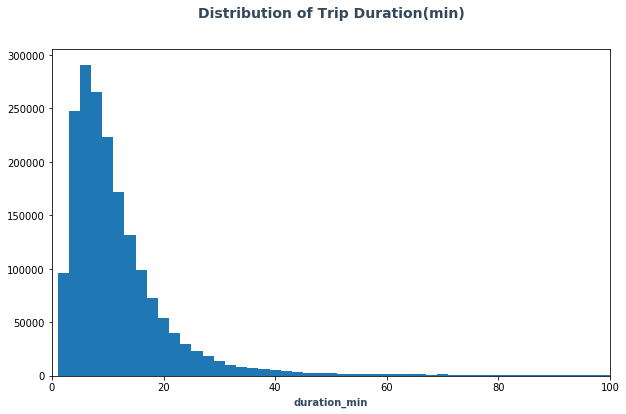

In [46]:
plt.figure(figsize=[10,6])
bins = np.arange(df['duration_min'].min(), df['duration_min'].max()+2, 2)
plt.hist(data = df , x = 'duration_min' , bins = bins)
plt.title('Distribution of Trip Duration(min)', y=1.08, fontsize=14, fontweight='bold', color='#34495e')
plt.xlim(0,100) # add an xlim since it's really hard to undersatnd the shape without the xlim
plt.xlabel('duration_min', fontsize=10, fontweight='bold', color='#34495e');

**`Observation :`**
> The plot is right skewed with a long tail on the right, so it's good a add a log transformation to the shape.

In [23]:
# Get the min and max of the log(duration_min)
np.log(df.duration_min.describe())

count    14.438086
mean      2.624438
std       3.676478
min       0.000000
25%       1.609438
50%       2.197225
75%       2.639057
max       7.271704
Name: duration_min, dtype: float64

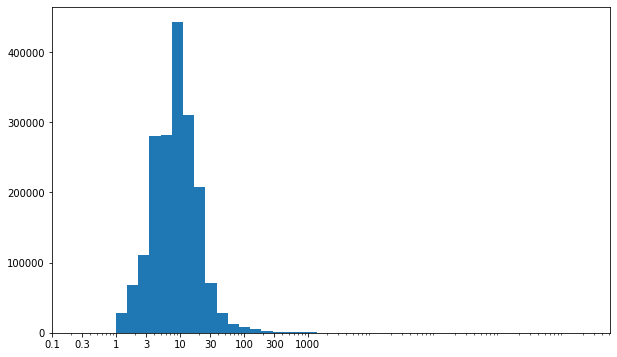

In [24]:
# Plot the distribution using the log transformation
plt.figure(figsize=[10,6])
bins = 10**np.arange(0, 7.27 + 0.175, 0.175)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xlim(300)
plt.xticks(ticks, labels);

**`Observation :`**
> We could see from the above distribution that on average people use the bike for short trips( more or less than 10 min)

##### What is the dominant gender and user_type in the data set ?

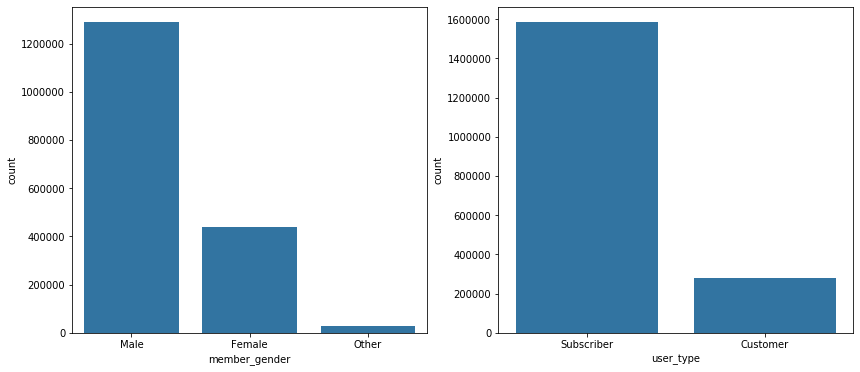

In [25]:
plt.figure(figsize=[14, 6])

# Gender
plt.subplot(1,2,1)
sb.countplot(data = df, x='member_gender', color = base_color)

# User Type
plt.subplot(1,2,2)

sb.countplot(data = df, x='user_type', color = base_color);

**`Observation :`**
> From the above charts, we can see that most of the users are Male and Subscribers.

##### How does the bike usage range from month to month ?

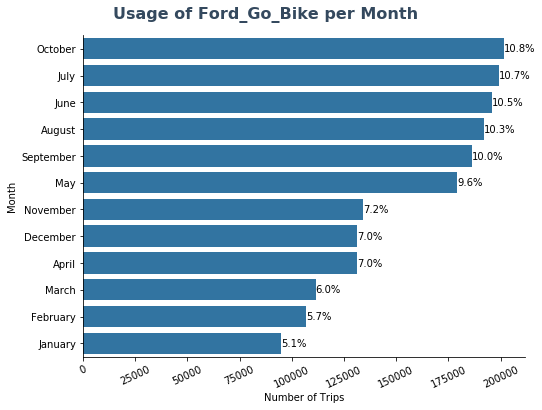

In [47]:
# get the shape of the data set
n_df = df.shape[0]

# counts of the values in the start_month column and set an order
month_counts = df['start_month'].value_counts()
month_order = df['start_month'].value_counts().index

# plot the distr
graph = sb.catplot(data = df, y = 'start_month', kind = 'count', 
                   color = base_color, aspect = 1.5, order = month_order)

#Using loop to place text elements one by one (percentage).
for i in range(month_counts.shape[0]):
    count = month_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string, va = 'center')

graph.set_axis_labels('Number of Trips', 'Month')
graph.fig.suptitle('Usage of Ford_Go_Bike per Month', y = 1.05, fontsize = 16, 
                   fontweight = 'bold', color='#34495e')
graph.set_xticklabels(rotation=25);

**`Observation :`**
> As expected most of the trips was taken in months with hot weather(May, June, July, August, September, and October) with 10.8% in October as the most popualar month.

##### How does the bike usage range in the weekdays?

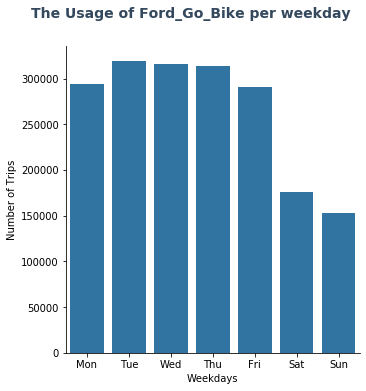

In [27]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=df, x='start_weekday', kind='count', color = base_color, order = weekday)
graph.set_axis_labels('Weekdays', 'Number of Trips')
graph.fig.suptitle('The Usage of Ford_Go_Bike per weekday', y=1.08, fontsize=14, fontweight='bold', color='#34495e');

**`Observation :`**
- The most popular days of using the Ford GoBike System are the working days with Wednesdays, Tuesdays and Thursdays at the top.
- In Saturdays and Sundays the Use of the Bike System register a huge decrease. we can say that the bike system is used during the working days to commit some goals in the working days.
- Let's dig down into the hour of use to see if the bike system are mostly used in a given hour.

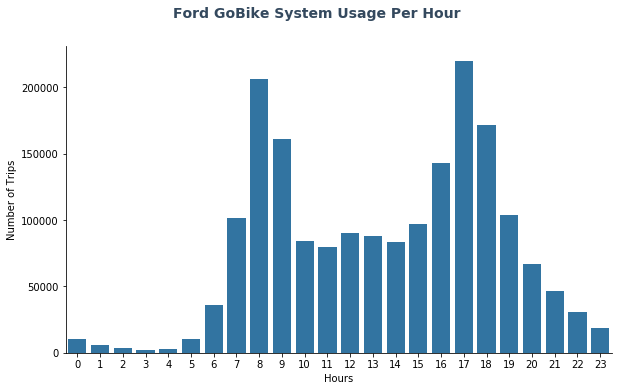

In [28]:

graph = sb.catplot(data = df, x='starting_hour', kind='count', color = base_color, aspect = 1.7)
graph.set_axis_labels('Hours', 'Number of Trips')
graph.fig.suptitle('Ford GoBike System Usage Per Hour', y=1.08, fontsize=14, fontweight='bold', color='#34495e');

**`Observation :`**
- From the chart, we can observe that the use of the bike system are mostly used at eight in the morning and at five in the afternoon, and this can lead us to the idea that the bike system is used to go to work or return from it (Used as transportation to the work) and that is because these two times(8H and 17H are the hours to go to work and return from it). And this suggestion strengthen the idea that the Ford GoBike system used primarily in the working days as transportation to work.

##### What is the distribution of the distance traveled ?

In [29]:
df.distance_km.describe()

count    1.863721e+06
mean     1.590929e+00
std      1.028363e+00
min      0.000000e+00
25%      8.675434e-01
50%      1.374590e+00
75%      2.087453e+00
max      6.530925e+01
Name: distance_km, dtype: float64

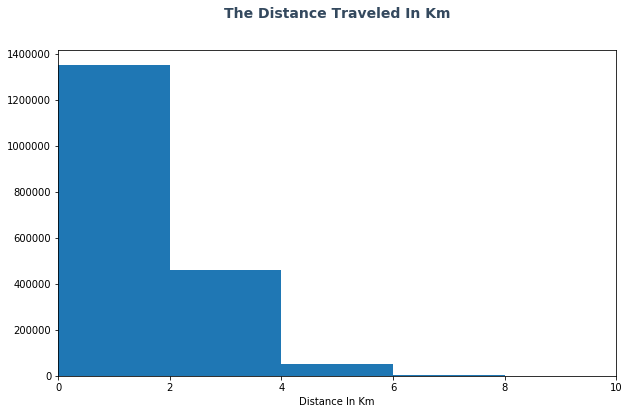

In [30]:
plt.figure(figsize=[10,6])
bins = np.arange(df['distance_km'].min(), df['distance_km'].max()+2, 2)
plt.hist(data = df , x = 'distance_km' , bins = bins)
plt.xlim(0,10)
plt.title('The Distance Traveled In Km', y=1.08, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('Distance In Km');

**`Observation :`**
- 75% of the trips were about 2.08 Km and the average distance traveled is about 1.37 Km (from the describe function).
- If we look at the above distribution, we can see that a vast majority of the trips were less than 2 km.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The plots showed no big surprises, but the two plots of the duration and the distance were skewed with a long tail on the right, and that gives us an idea that these two variables are having some outliers that need to eb aware of. And for the distribution of the duration_min, I have add a log transformation so that I can easily understand the distribution and having a clear view.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions so far were not out of the normal, everything almost was as expected. However a small thing that capture my attention is that the users are more likely to be men and not women. 

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the data set.

##### 1. Does the user type influence the trip duration?

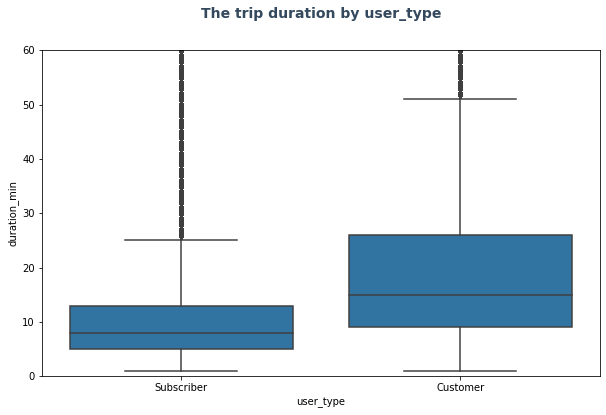

In [31]:
plt.figure(figsize=[10,6])
sb.boxplot(data=df, x='user_type', y='duration_min', color=base_color)
plt.title('The trip duration by user_type', y=1.08, fontsize=14, fontweight='bold', color='#34495e')
plt.ylim(0,60); # I've add the ylim because the duration_min has outliers

**` Observation `**
> From the above boxplots, we can see that customers are driving long durations on average compared to subscribers.

##### 2. Does the user type influence the trip distance?

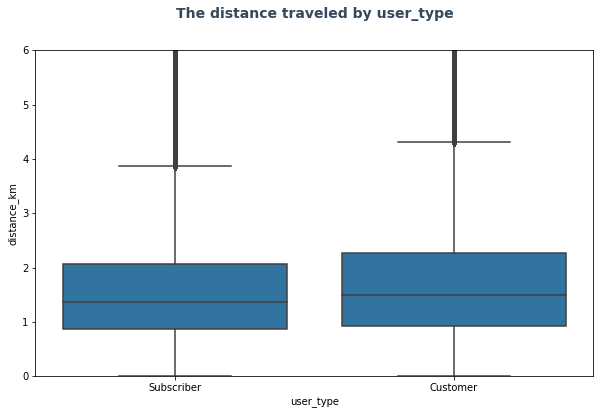

In [32]:
plt.figure(figsize=[10,6])
sb.boxplot(data=df, x='user_type', y='distance_km', color=base_color)
plt.title('The distance traveled by user_type', y=1.08, fontsize=14, fontweight='bold', color='#34495e')
plt.ylim(0,6); # I've add the ylim because the duration_min has outliers

**` Observation `**
> From the above boxplots, we can see that customers are driving long distance on average compared to subscribers.

##### 3. Number of trips based on weekdays and user_type?

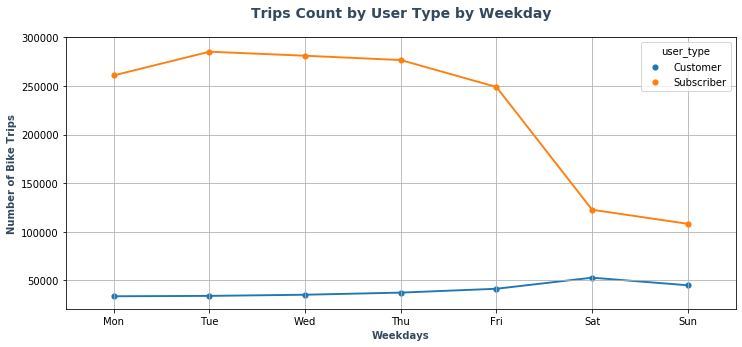

In [33]:
plt.figure(figsize=(12, 5))

weekly_userType = df.groupby(['start_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data = weekly_userType, x='start_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Trips Count by User Type by Weekday', y=1.05, fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel('Weekdays', y=1.05, fontsize=10, fontweight='bold', color='#34495e')
plt.ylabel('Number of Bike Trips', fontsize=10, fontweight='bold', color='#34495e')
plt.grid();

**` Observation `**
- Because the number of Subscribers is a lot higher than the number of casual Customers, then the number of trips of Subscribers will be higher compared to the casual Customers' trips.
- On Sundays and Saturdays, we can easily see that subscribers' trips have dropped enormously, and this remind us of the first idea we have proposed, that the bike is used primarily as a transportation tool to work or school. However the use of bike by casual Customers increased a bit on weekedns.

##### 4. What about the relationship between the starting hour and the starting day ?

> Let's first see at the weekday usage of the Ford Go Bike system distributions of each hour, so that we can exclude some hours from the data.

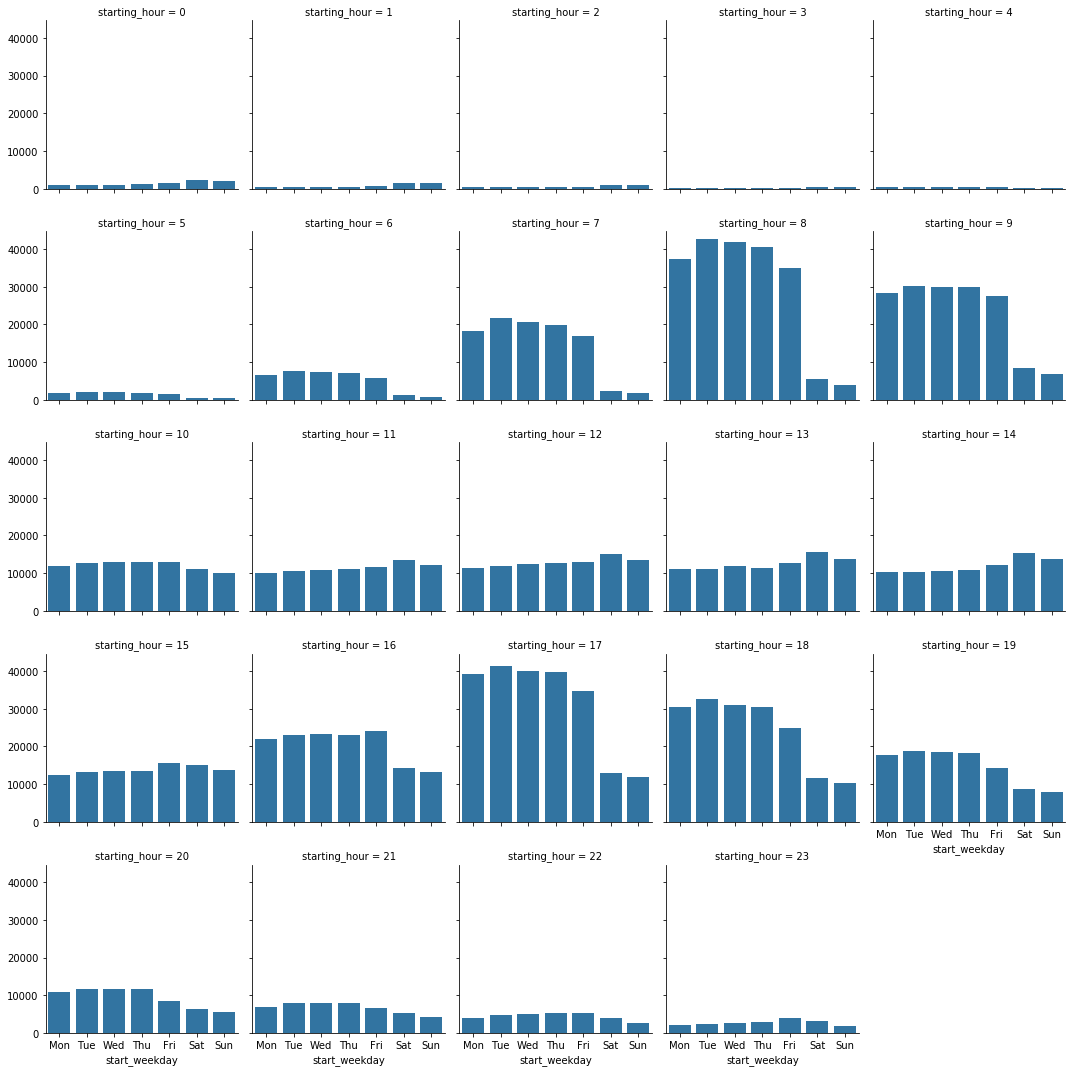

In [34]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.FacetGrid(data = df, col='starting_hour', col_wrap=5, sharey=True)
g.map(sb.countplot, 'start_weekday', order=weekday); 

**` Observation `**
> As expected, the Bike usage are less in early morning and evening hours. So we are going to check only the data based on the hours from **`7h am to 9h am`** and from **`17h pm to 19h pm`**.

> I have split the data in two groups; the first group contains data of the morning hours, and the other contains data of the afternoon or the evening hours, so that it can be more visible and understandable.

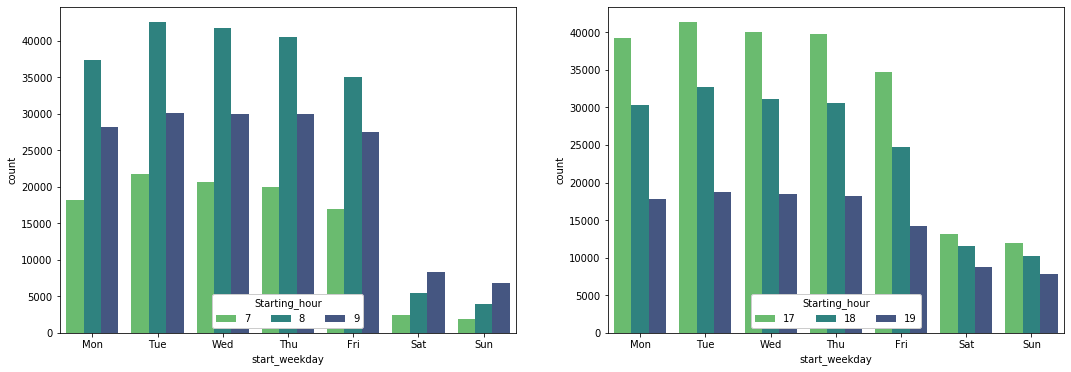

In [35]:
plt.figure(figsize=[18,6])
morning_hours = df.loc[df['starting_hour'].isin([7, 8, 9])]
evening_hours = df.loc[df['starting_hour'].isin([17, 18, 19])]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.subplot(1,2,1)
ax = sb.countplot(data = morning_hours, x='start_weekday', hue='starting_hour', order=weekday, palette='viridis_r')
ax.legend(loc=4, framealpha=1, title='starting_hour')
ax.legend(loc=8, ncol=3, framealpha=1, title='Starting_hour')

plt.subplot(1,2,2)
ax = sb.countplot(data = evening_hours, x='start_weekday', hue='starting_hour', order=weekday, palette='viridis_r')
ax.legend(loc=4, framealpha=1, title='starting_hour')
ax.legend(loc=8, ncol=3, framealpha=1, title='Starting_hour');

**` Observation `**
> The above charts strengthen the idea we said before, that the Bike is used to go or return from work, since it is highly used during the working weekdays during the hours that seems to be the time that one will go to his work/school or return from it.

##### 5. What is the relationship between the duration_min and the distance_km ?

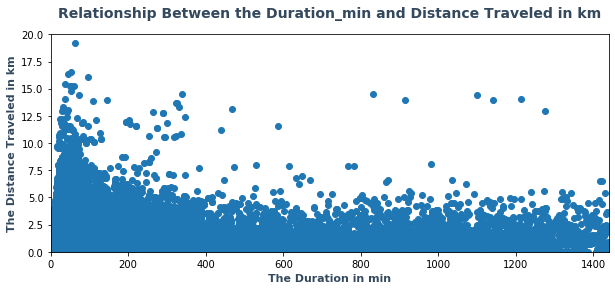

In [36]:
plt.figure(figsize=[10,4])

plt.scatter(data = df, x='duration_min', y='distance_km')

plt.title('Relationship Between the Duration_min and Distance Traveled in km', 
          y=1.05, fontsize=14, fontweight='bold', color='#34495e')

plt.xlabel('The Duration in min', y=1.05, fontsize=11, fontweight='bold', color='#34495e')

plt.ylabel('The Distance Traveled in km', fontsize=11, fontweight='bold', color='#34495e')

plt.ylim(0,20)
plt.xlim(0,df.duration_min.max());

**` Observation `**
> As expected, as the duration gets higher, the distance traveled gets smaller.

##### 6. How the bike usage vary from month to month based on the user type?

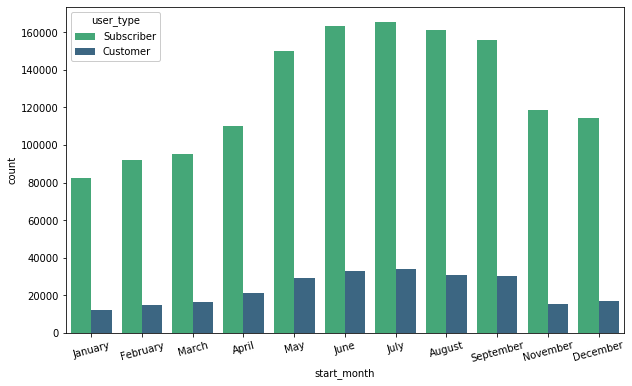

In [50]:
plt.figure(figsize=[10,6])
months=['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'November', 'December']
ax = sb.countplot(data = df, x='start_month', hue='user_type', order=months, palette='viridis_r')
ax.legend(loc=2, ncol=1, framealpha=1, title='user_type')
plt.xticks(rotation=15);

**` Observation `**
> As we have seen before the use of bike increases in summer months for both subcribers and casual customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user_type to the plots, showed that the use of the bike differ between customers and subscribers: 

- The number of trips drop on Saturdays and Sundays for the Subscribers and get increased a bit for casual Customers.
- For the casual Customers, the trends are a bit constant in the working weekdays, but on Saturdays, we noticed a little increase in the number of trips, and that may be due to the idea that a casual customer tends to rent the bike On weekends when he will be free to participate in the Ford Go_Bike system.
- When we plot the use of bike on weekdays and hours, this strengthen the idea we said before, that the Bike is used to go or return from work, since it is highly used during the working weekdays and during the hours that seems to be the time that one will go to his work or return from it.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers tend to use the bike for a long duration and travel long distance on average compared to Subscribers. And that's maybe because the subscribers tend to use the bike to commit daily tasks and not to take the bike as a tool of ammusement only, opposed to casual customers that are more likely to use the bike as amusement and that is why the use of the bike by this group increases on weekends and summertime.

## Multivariate Exploration

> In this section I am going to create plots of three or more variables to investigate the data even further.

#### 1. How the average duration and the average distance traveled vary from month to month based on user_type?

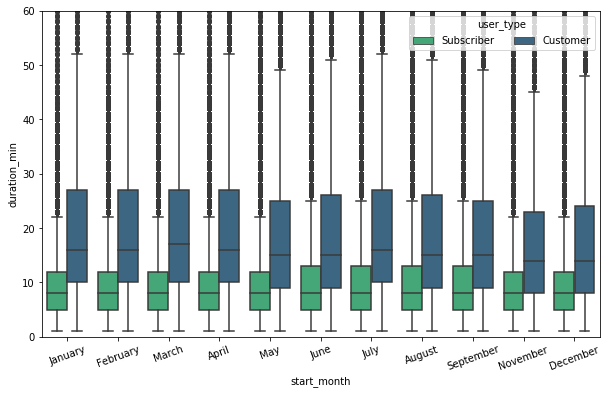

In [38]:
# A. The variation of duration_min during the year based on user_type
plt.figure(figsize=[10,6])
months=['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'November', 'December']
ax = sb.boxplot(data=df, x='start_month', y='duration_min', hue='user_type', order=months, palette='viridis_r')
ax.legend(loc=1, ncol=2, title='user_type')
plt.xticks(rotation= 20)
plt.ylim(0,60);

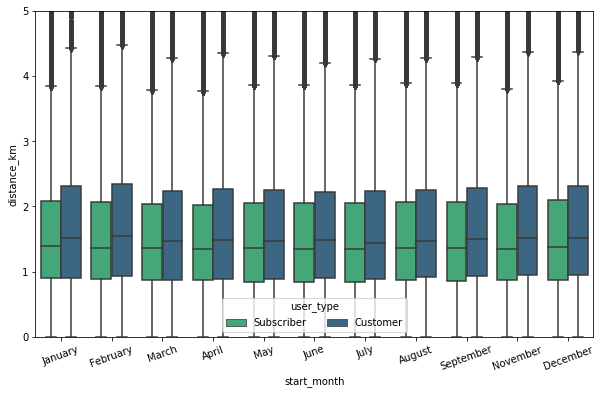

In [39]:
# A. The variation of distance_km during the year based on user_type
plt.figure(figsize=[10,6])
months=['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'November', 'December']
ax = sb.boxplot(data=df, x='start_month', y='distance_km', hue='user_type', order=months, palette='viridis_r')
ax.legend(loc=8, ncol=2, title='user_type')
plt.xticks(rotation= 20)
plt.ylim(0,5);

**` Observation `**
> There is a significant difference in terms of Avg. duration between casual Customers and Subscribers, as the first type of customers tend to ride the bike more than the second in terms of **minute_duration**.<br><br>
> In terms of distance traveled, the casual Customers still traveled long distnace on average during the whole year compared to Subscribers. However, this difference in average distance traveled is not that much, as it is a small difference.

>And now let's look at the number of trips per user_type, by gender and months.

#### 2. Number of trips broken down by month, gender and user_type?

/Users/lahsini/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


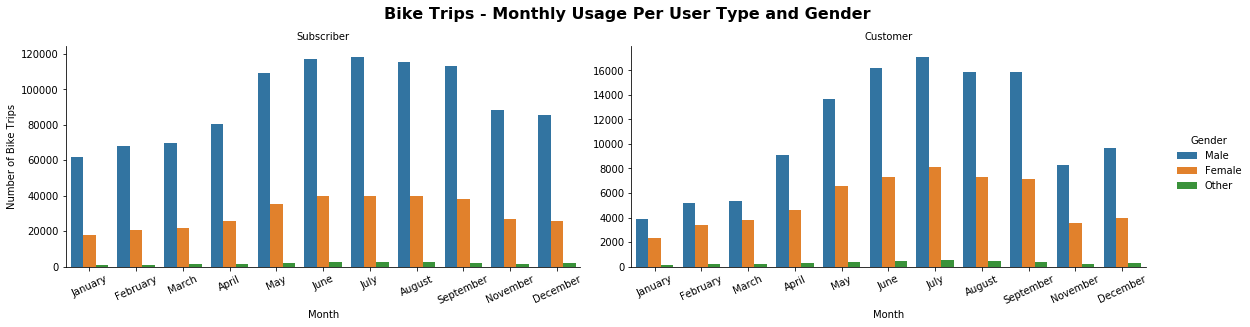

In [40]:
months=['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'November', 'December']
graph = sb.catplot(data=df, x='start_month', col="user_type", hue="member_gender", 
                   kind='count', sharey = False, aspect=2, size=4, order=months)

graph.set_axis_labels("Month", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Bike Trips - Monthly Usage Per User Type and Gender', 
                   y=1.05, fontsize=16, fontweight='bold')
graph.set_xticklabels(rotation=25);

**` Observation `**
> The count number of trips highly increases in summer time for both Subscribers and Casual Customers and for all member_gender. Because the number of Subscribers and Male are bigger than casual Customers and other gender respectively, it is normal that the number of dike trips will be higher for the first groups.

> And now let's look at the trends per user_type, by weekday and gender

#### 3. Number of trips broken down by weekday, gender and user_type?

/Users/lahsini/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


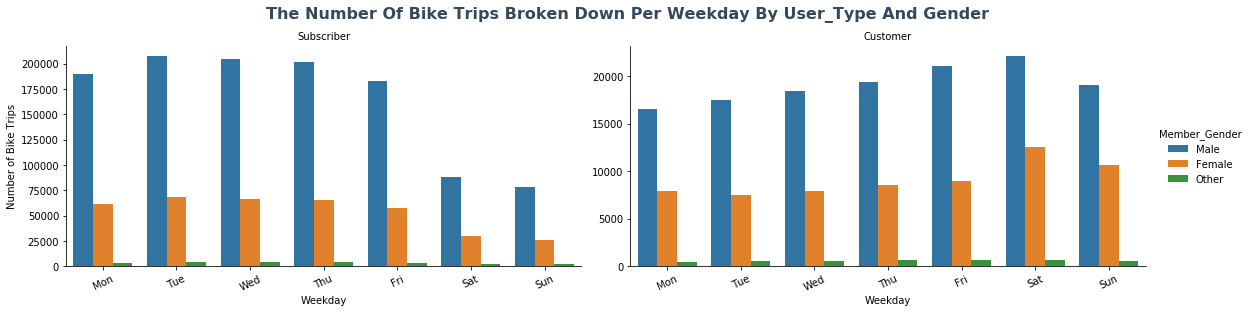

In [48]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph = sb.catplot(data=df, x='start_weekday', col="user_type", hue="member_gender", 
                   kind='count', sharey = False, aspect=2, size=4, order=weekdays)

graph.set_axis_labels("Weekday", "Number of Bike Trips")
graph._legend.set_title('Member_Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('The Number Of Bike Trips Broken Down Per Weekday By User_Type And Gender', 
                   y = 1.05, fontsize = 16, fontweight = 'bold', color='#34495e')
graph.set_xticklabels(rotation=25);

**` Observation `**
> On weekends, the count number of trips is increasing for casual Customers and decreasing for Subscribers for all member_gender. <br><br>
During the working weekdays (Mondays to Friday), we observe that the count number of trips increases for Subscribers and decreases for Casual Customers for all member_gender.

> And now let's look at the trends per user_type, by weekday and hours.

#### 4. Number of trips broken down by weekday, starting_hour and user_type?

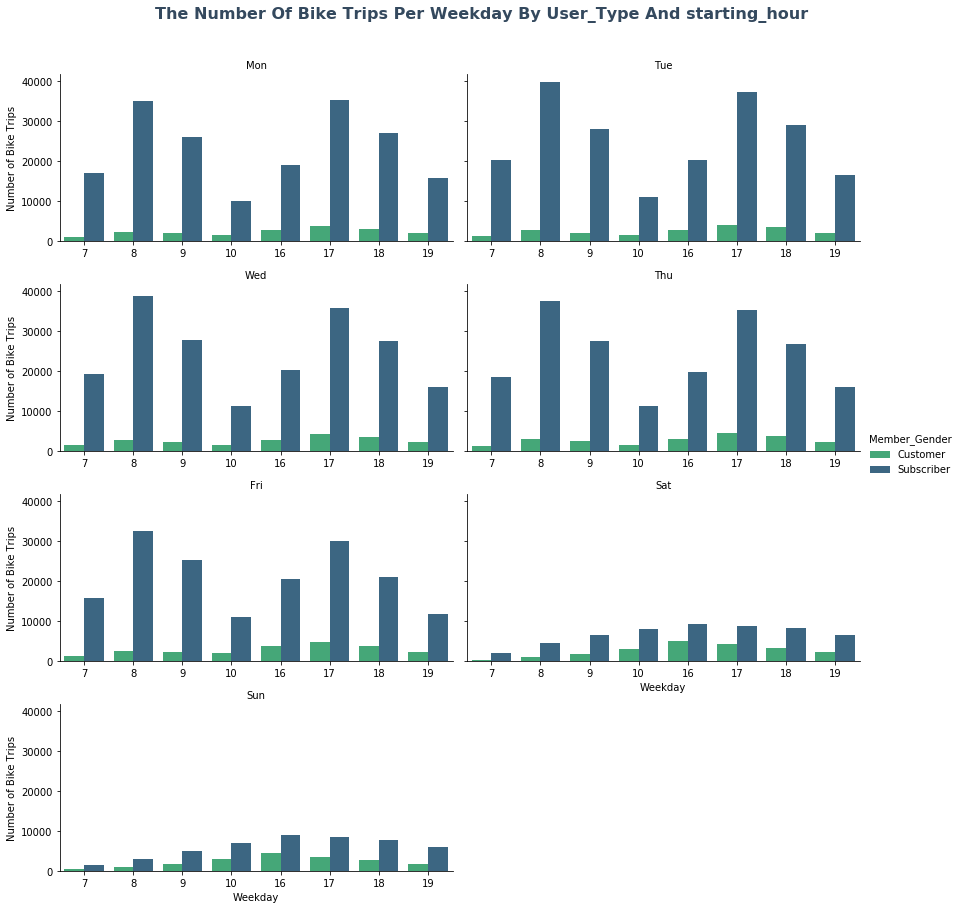

In [49]:
start_hours = df.loc[df['starting_hour'].isin([7, 8, 9, 10, 16, 17, 18, 19])]
graph = sb.catplot(data=start_hours, x='starting_hour', col="start_weekday", hue="user_type", kind='count', 
                   sharey = True, sharex=False, aspect=2, col_wrap=2, size=3, palette="viridis_r", col_order=weekdays)

graph.set_axis_labels("Weekday", "Number of Bike Trips")
graph._legend.set_title('Member_Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('The Number Of Bike Trips Per Weekday By User_Type And starting_hour', y = 1.05, fontsize = 16, 
                   fontweight = 'bold', color='#34495e');

**` Observation `**
> The above chart showed that the number of bike trips for Subscribers tends to be very active during the working weekdays, especially at **`8h am and 17h pm`**. On weekends the number dropped enormously for this group.<br><br>
For Casual Custmers, the use of the bike remain almost the same in all days with a smal diffrence in some days.

> And now let's look at the relationship between Avg. duration, Avg. distance and starting_hour per user_type.

#### 5. How the distance and duration relate to the starting hour and start weekday for Subscribers and Casual Customers?

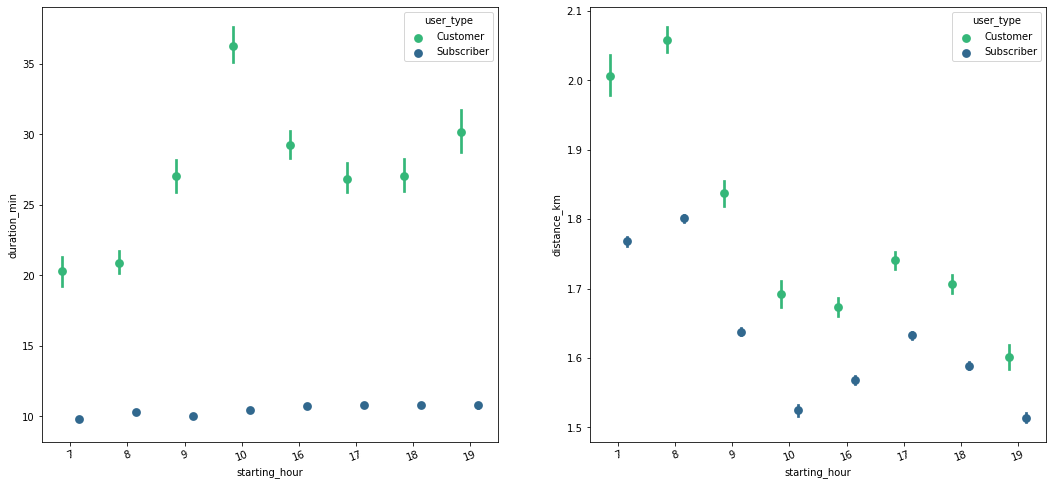

In [43]:
# Avg. distance and Avg. duration per starting hour by user type 
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
ax = sb.pointplot(data = start_hours, x = 'starting_hour', y = 'duration_min',
                  hue = 'user_type', palette='viridis_r', dodge = 0.3, linestyles = "")
plt.xticks(rotation=20)

plt.subplot(1,2,2)
ax = sb.pointplot(data = start_hours, x = 'starting_hour', y = 'distance_km',
                  hue = 'user_type', dodge = 0.3, palette='viridis_r', linestyles = "")
plt.xticks(rotation=20);

**` Observation `**
> As we have seen before, casual customers tend to use the bike for a long duration and traveled a long distance on average compared to Subscribers during the whole day as well.<br><br>
We observe that the average duration remains almost the same for Subscribers during the whole day, and that reminds us of our first idea that subscribers tend to use the bike to commit daily tasks (like going or returning from work). On the other side, the average distance traveled by Subscribers is at the top at **`8h am`**, and register another increase at **`17h pm`**.<br><br>
> The top average duration for casual customers was at **`10h am`**.

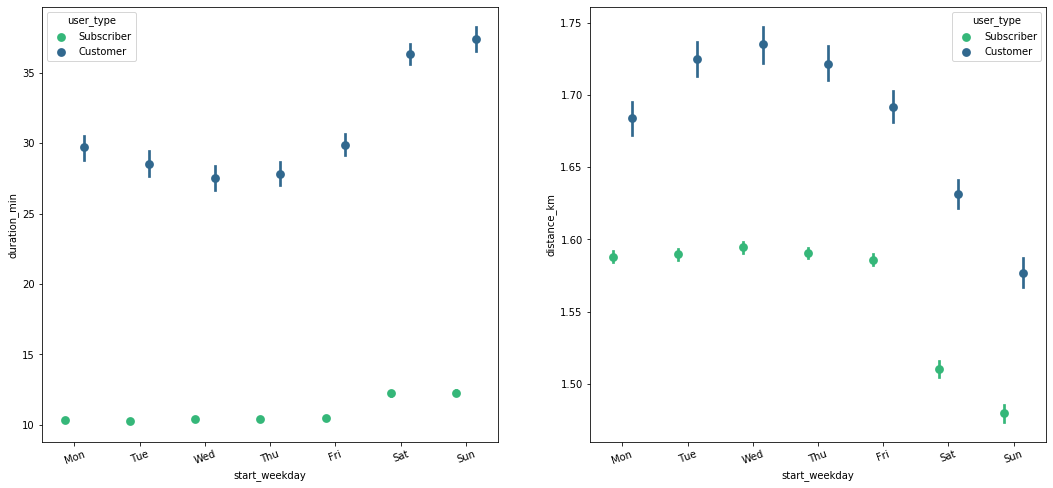

In [44]:
# Avg. distance and Avg. duration per start_day by user type 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
ax = sb.pointplot(data = df, x = 'start_weekday', y = 'duration_min', order=weekday,
                  hue = 'user_type', palette='viridis_r', dodge = 0.3, linestyles = "")
plt.xticks(rotation=20)

plt.subplot(1,2,2)
ax = sb.pointplot(data = df, x = 'start_weekday', y = 'distance_km', order=weekday,
                  hue = 'user_type', dodge = 0.3, palette='viridis_r', linestyles = "")
plt.xticks(rotation=20);

**` Observation `**
> As we have seen before, casual customers tend to use the bike for a long duration and traveled a long distance on average compared to Subscribers during the whole week as well.<br><br>
We observe that the average duration remains almost the same for Subscribers during the whole week (with a tiny increase in the weekend), and that reminds us of our first idea that subscribers tend to use the bike to commit daily tasks (like going or returning from work). On the other side, the average distance traveled by Subscribers dropped in the weekend as we have seen before.<br><br>
> For casual Customers, their was an increase in terms of average duration in the weekends, and a decease in terms of distance traveled in the same period.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I have extended my invistigation by adding the user type to almost every important plot such as the Avg. duration and the average distance traveled in each month, day and hour, as well as the number of trips per user_type broken down by hour, weekday, and month of the year.<br><br>

### Were there any interesting or surprising interactions between features?

> Two things that capture my eye is that casual customers are using the bike for a long distance and a long duration on average compared to Subscribers. The other thing is that the Avg. duration has increased for both subscriber and casual customers, while the Avg. distance has decreased. And this can strengthen the idea we have been saying so far is that the bike is used primarily to commit daily tasks in the weekdays (**that is why the Avg. duration was small because they may be riding the bike fast to complete their goal**) and for amusement in the weekends.